In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

2023-07-02 00:48:45.391694


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-3237.2769)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5603)tensor(7.8012)tensor(5.0716)tensor(6.2206)tensor(4.8685)tensor(2.8925)tensor(4.4704)tensor(4.0617)tensor(6.6139)tensor(4.6311)tensor(4.3928)tensor(3.8577)tensor(9.3193)tensor(4.5292)tensor(5.8744)tensor(3.9921)tensor(6.4024)tensor(2.9353)tensor(6.2154)tensor(3.4592)tensor(3.4435)tensor(4.5028)tensor(8.3062)tensor(5.3777)tensor(5.0670)tensor(5.4737)tensor(14.2373)tensor(7.9948)tensor(3.9949)tensor(4.3561)tensor(5.9210)tensor(4.7802)tensor(3.7669)tensor(4.7080)tensor(5.3056)tensor(3.7375)tensor(6.6547)tensor(2.6679)tensor(4.5522)tensor(4.8188)tensor(3.8458)tensor(2.7985)tensor(3.4235)tensor(3.9830)tensor(3.3115)tensor(3.8838)tensor(6.1548)tensor(3.5978)tensor(5.9192)tensor(3.4740)tensor(4.8098)tensor(4.8402)tensor(2.5201)tensor(4.5802)tensor(7.0499)tensor(3.2051)tensor(4.5405)tensor(2.8316)tensor(8.7442)tensor(5.4750)tensor(7.0682)tensor(4.4035)tensor(3.1098)tensor(7.2756)tensor(4.2729)tensor(5.2440)tensor(6.3833)tensor(6.0325)tensor(3.7097)tensor(6.2504)tensor(6.2291)tenso

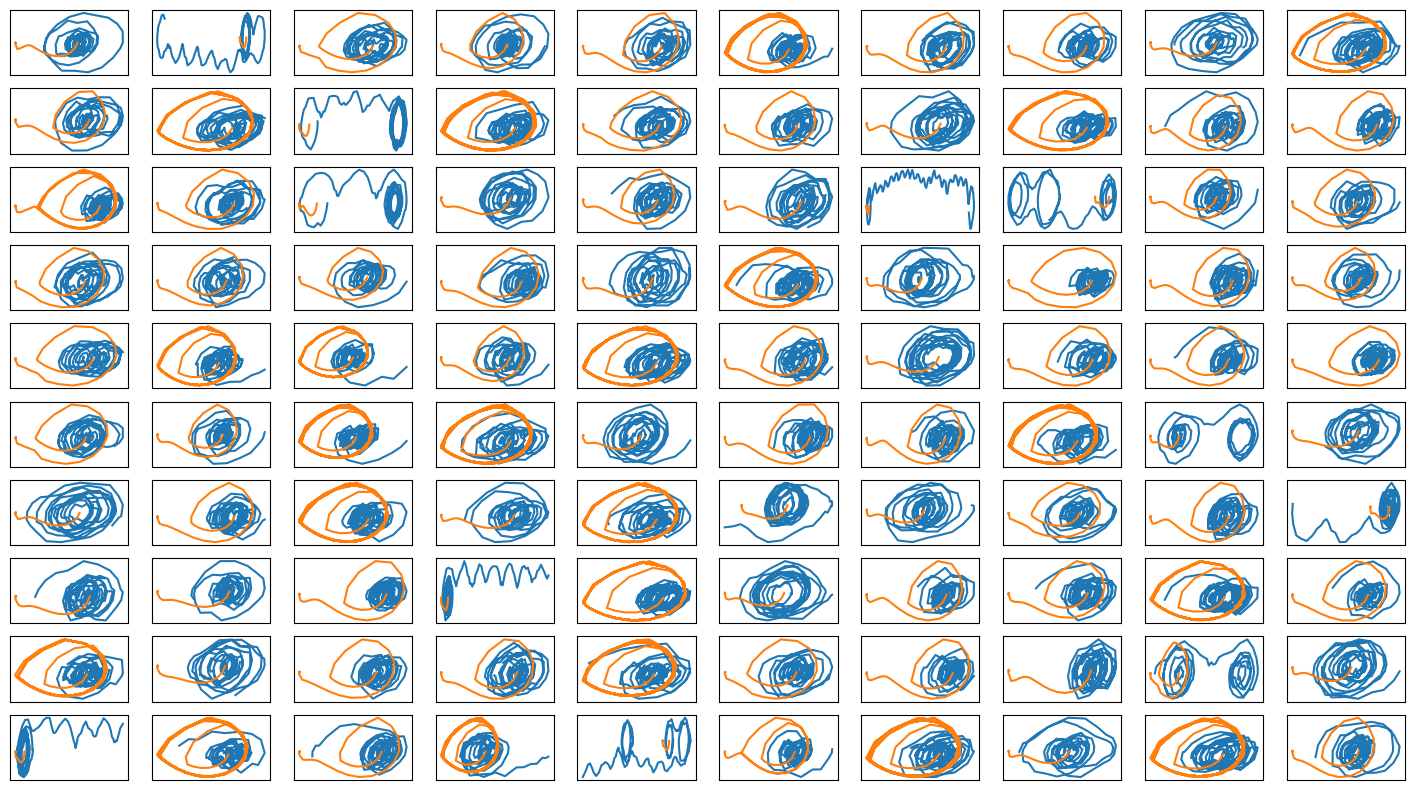

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 501.06167  validloss 600.56140±0.00000  bestvalidloss 600.56140  last_update 0
train: iter 1  trainloss 515.08174  validloss 440.78464±0.00000  bestvalidloss 440.78464  last_update 0
train: iter 2  trainloss 403.35903  validloss 757.66640±0.00000  bestvalidloss 440.78464  last_update 1
train: iter 3  trainloss 321.26841  validloss 392.07073±0.00000  bestvalidloss 392.07073  last_update 0
train: iter 4  trainloss 225.53718  validloss 248.50786±0.00000  bestvalidloss 248.50786  last_update 0
train: iter 5  trainloss 128.96866  validloss 149.86630±0.00000  bestvalidloss 149.86630  last_update 0
train: iter 6  trainloss 88.00961  validloss 104.35283±0.00000  bestvalidloss 104.35283  last_update 0
train: iter 7  trainloss 56.19136  validloss 82.90216±0.00000  bestvalidloss 82.90216  last_update 0
train: iter 8  trainloss 20.21358  validloss 37.90036±0.00000  bestvalidloss 37.90036  last_update 0
train: iter 9  trainloss -11.23722  validloss -2.834

train: iter 77  trainloss -518.46300  validloss -495.38808±0.00000  bestvalidloss -563.31560  last_update 1
train: iter 78  trainloss -521.29645  validloss -572.57178±0.00000  bestvalidloss -572.57178  last_update 0
train: iter 79  trainloss -519.80774  validloss -557.05807±0.00000  bestvalidloss -572.57178  last_update 1
train: iter 80  trainloss -530.31296  validloss -528.08476±0.00000  bestvalidloss -572.57178  last_update 2
train: iter 81  trainloss -508.50102  validloss -566.47456±0.00000  bestvalidloss -572.57178  last_update 3
train: iter 82  trainloss -516.84038  validloss -535.16891±0.00000  bestvalidloss -572.57178  last_update 4
train: iter 83  trainloss -508.43704  validloss -535.84225±0.00000  bestvalidloss -572.57178  last_update 5
train: iter 84  trainloss -517.54465  validloss -574.30513±0.00000  bestvalidloss -574.30513  last_update 0
train: iter 85  trainloss -537.79576  validloss -579.88520±0.00000  bestvalidloss -579.88520  last_update 0
train: iter 86  trainloss -5

train: iter 153  trainloss -611.08411  validloss -675.71981±0.00000  bestvalidloss -686.67850  last_update 13
train: iter 154  trainloss -635.20979  validloss -603.29696±0.00000  bestvalidloss -686.67850  last_update 14
train: iter 155  trainloss -606.65311  validloss -666.37922±0.00000  bestvalidloss -686.67850  last_update 15
train: iter 156  trainloss -641.67192  validloss -667.88610±0.00000  bestvalidloss -686.67850  last_update 16
train: iter 157  trainloss -649.14569  validloss -679.85949±0.00000  bestvalidloss -686.67850  last_update 17
train: iter 158  trainloss -657.49760  validloss -690.91536±0.00000  bestvalidloss -690.91536  last_update 0
train: iter 159  trainloss -646.04889  validloss -643.36743±0.00000  bestvalidloss -690.91536  last_update 1
train: iter 160  trainloss -647.15161  validloss -690.26588±0.00000  bestvalidloss -690.91536  last_update 2
train: iter 161  trainloss -654.57744  validloss -666.62110±0.00000  bestvalidloss -690.91536  last_update 3
train: iter 16

train: iter 228  trainloss -671.11533  validloss -720.04902±0.00000  bestvalidloss -733.11441  last_update 29
train: iter 229  trainloss -644.37252  validloss -718.83129±0.00000  bestvalidloss -733.11441  last_update 30
train: iter 230  trainloss -676.39580  validloss -652.21885±0.00000  bestvalidloss -733.11441  last_update 31
train: iter 231  trainloss -681.89346  validloss -721.82930±0.00000  bestvalidloss -733.11441  last_update 32
train: iter 232  trainloss -634.62200  validloss -686.85311±0.00000  bestvalidloss -733.11441  last_update 33
train: iter 233  trainloss -658.18027  validloss -655.76060±0.00000  bestvalidloss -733.11441  last_update 34
train: iter 234  trainloss -658.96567  validloss -671.17980±0.00000  bestvalidloss -733.11441  last_update 35
train: iter 235  trainloss -666.31697  validloss -671.98492±0.00000  bestvalidloss -733.11441  last_update 36
train: iter 236  trainloss -669.01084  validloss -709.28871±0.00000  bestvalidloss -733.11441  last_update 37
train: ite

train: iter 303  trainloss -708.97089  validloss -710.45955±0.00000  bestvalidloss -756.73792  last_update 6
train: iter 304  trainloss -696.02485  validloss -741.02363±0.00000  bestvalidloss -756.73792  last_update 7
train: iter 305  trainloss -681.78893  validloss -708.87589±0.00000  bestvalidloss -756.73792  last_update 8
train: iter 306  trainloss -694.49796  validloss -722.78160±0.00000  bestvalidloss -756.73792  last_update 9
train: iter 307  trainloss -699.13480  validloss -713.62330±0.00000  bestvalidloss -756.73792  last_update 10
train: iter 308  trainloss -680.53818  validloss -743.87812±0.00000  bestvalidloss -756.73792  last_update 11
train: iter 309  trainloss -702.83665  validloss -743.30578±0.00000  bestvalidloss -756.73792  last_update 12
train: iter 310  trainloss -706.23430  validloss -736.84071±0.00000  bestvalidloss -756.73792  last_update 13
train: iter 311  trainloss -681.97698  validloss -725.34390±0.00000  bestvalidloss -756.73792  last_update 14
train: iter 31

train: iter 378  trainloss -721.89852  validloss -765.89733±0.00000  bestvalidloss -766.77715  last_update 17
train: iter 379  trainloss -737.81530  validloss -749.49417±0.00000  bestvalidloss -766.77715  last_update 18
train: iter 380  trainloss -734.54689  validloss -768.49892±0.00000  bestvalidloss -768.49892  last_update 0
train: iter 381  trainloss -724.71982  validloss -767.67180±0.00000  bestvalidloss -768.49892  last_update 1
train: iter 382  trainloss -720.42382  validloss -744.06526±0.00000  bestvalidloss -768.49892  last_update 2
train: iter 383  trainloss -731.13995  validloss -759.97410±0.00000  bestvalidloss -768.49892  last_update 3
train: iter 384  trainloss -714.52027  validloss -743.23332±0.00000  bestvalidloss -768.49892  last_update 4
train: iter 385  trainloss -704.17567  validloss -746.11955±0.00000  bestvalidloss -768.49892  last_update 5
train: iter 386  trainloss -726.30231  validloss -719.78282±0.00000  bestvalidloss -768.49892  last_update 6
train: iter 387  

train: iter 453  trainloss -733.71073  validloss -757.62610±0.00000  bestvalidloss -794.58459  last_update 18
train: iter 454  trainloss -732.22668  validloss -733.19109±0.00000  bestvalidloss -794.58459  last_update 19
train: iter 455  trainloss -742.56395  validloss -757.44474±0.00000  bestvalidloss -794.58459  last_update 20
train: iter 456  trainloss -754.85714  validloss -752.00008±0.00000  bestvalidloss -794.58459  last_update 21
train: iter 457  trainloss -747.38031  validloss -758.70795±0.00000  bestvalidloss -794.58459  last_update 22
train: iter 458  trainloss -733.93994  validloss -750.93157±0.00000  bestvalidloss -794.58459  last_update 23
train: iter 459  trainloss -728.47413  validloss -768.41094±0.00000  bestvalidloss -794.58459  last_update 24
train: iter 460  trainloss -741.78058  validloss -772.90518±0.00000  bestvalidloss -794.58459  last_update 25
train: iter 461  trainloss -732.98949  validloss -775.75997±0.00000  bestvalidloss -794.58459  last_update 26
train: ite

train: iter 528  trainloss -750.28231  validloss -686.71648±0.00000  bestvalidloss -794.58459  last_update 93
train: iter 529  trainloss -756.40138  validloss -779.20863±0.00000  bestvalidloss -794.58459  last_update 94
train: iter 530  trainloss -731.63081  validloss -770.75048±0.00000  bestvalidloss -794.58459  last_update 95
train: iter 531  trainloss -760.19747  validloss -760.08482±0.00000  bestvalidloss -794.58459  last_update 96
train: iter 532  trainloss -741.70320  validloss -764.28609±0.00000  bestvalidloss -794.58459  last_update 97
train: iter 533  trainloss -759.58231  validloss -766.70563±0.00000  bestvalidloss -794.58459  last_update 98
train: iter 534  trainloss -761.83364  validloss -774.77097±0.00000  bestvalidloss -794.58459  last_update 99
train: iter 535  trainloss -762.83077  validloss -791.27158±0.00000  bestvalidloss -794.58459  last_update 100
train: fin
penalty_target_min tensor(-5.6830) penalty_target_max tensor(14.4632)


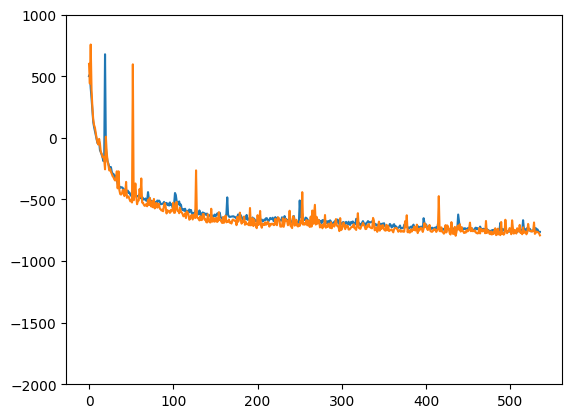

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


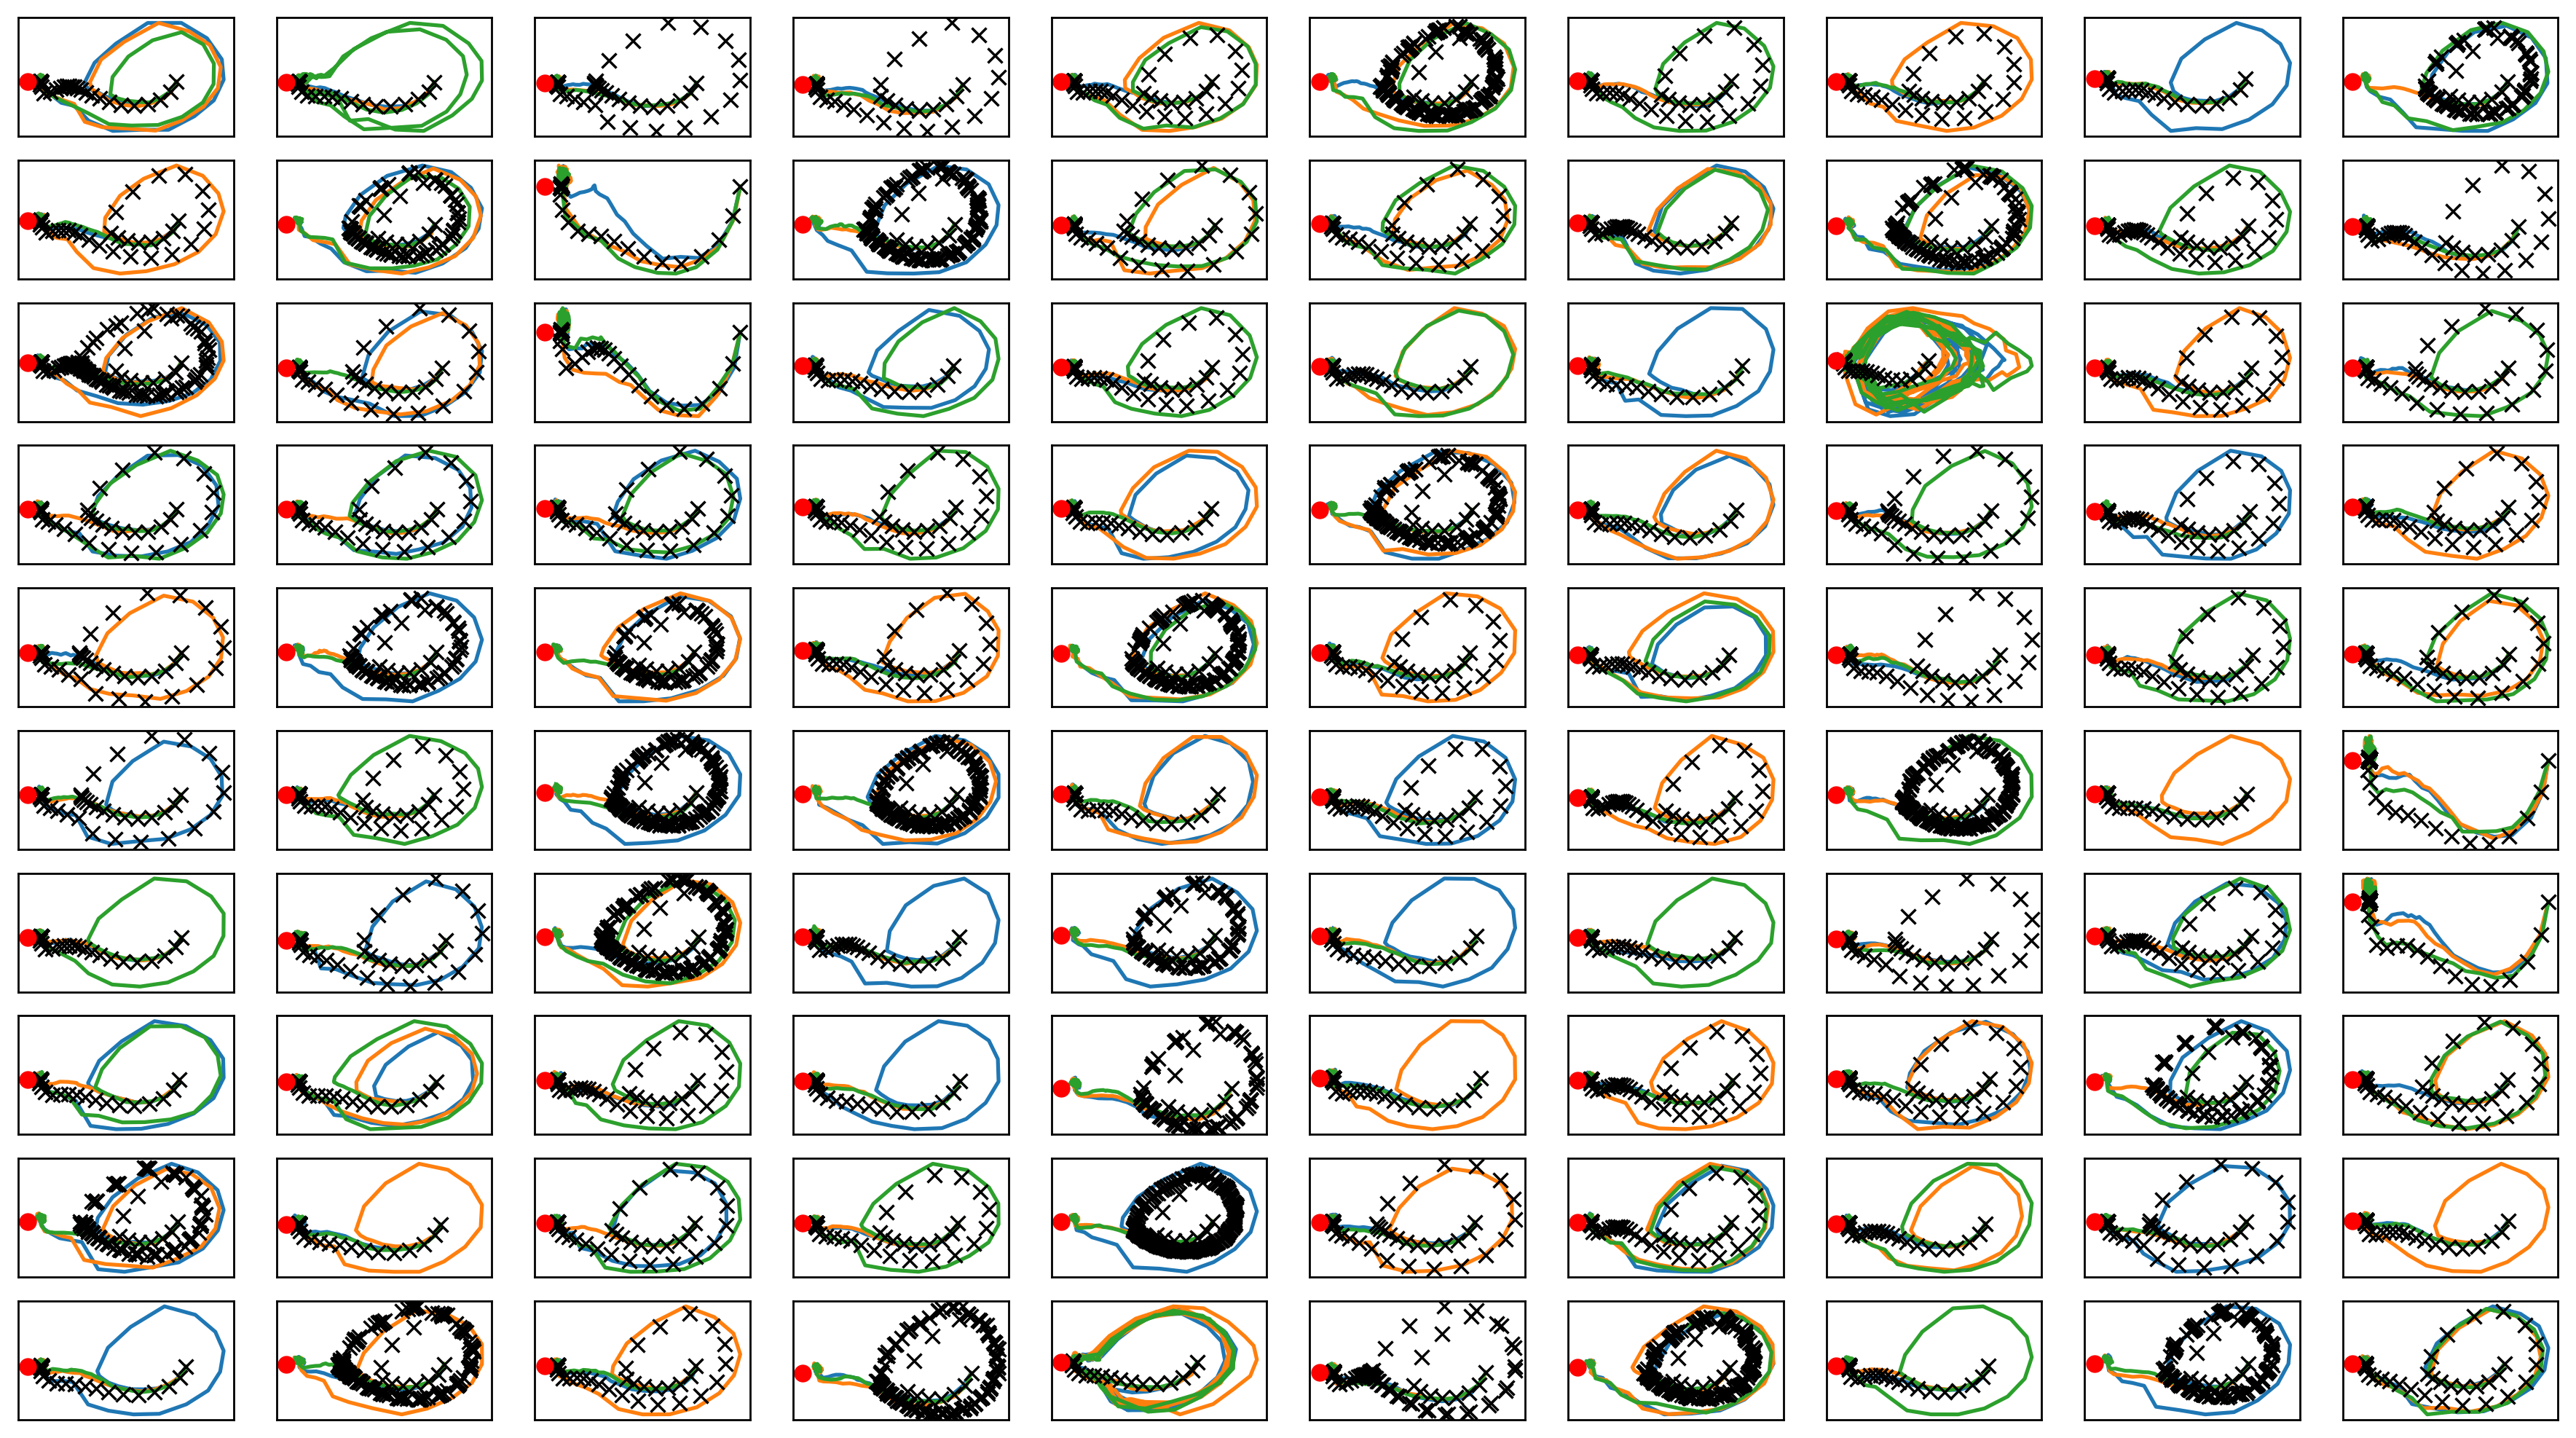

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

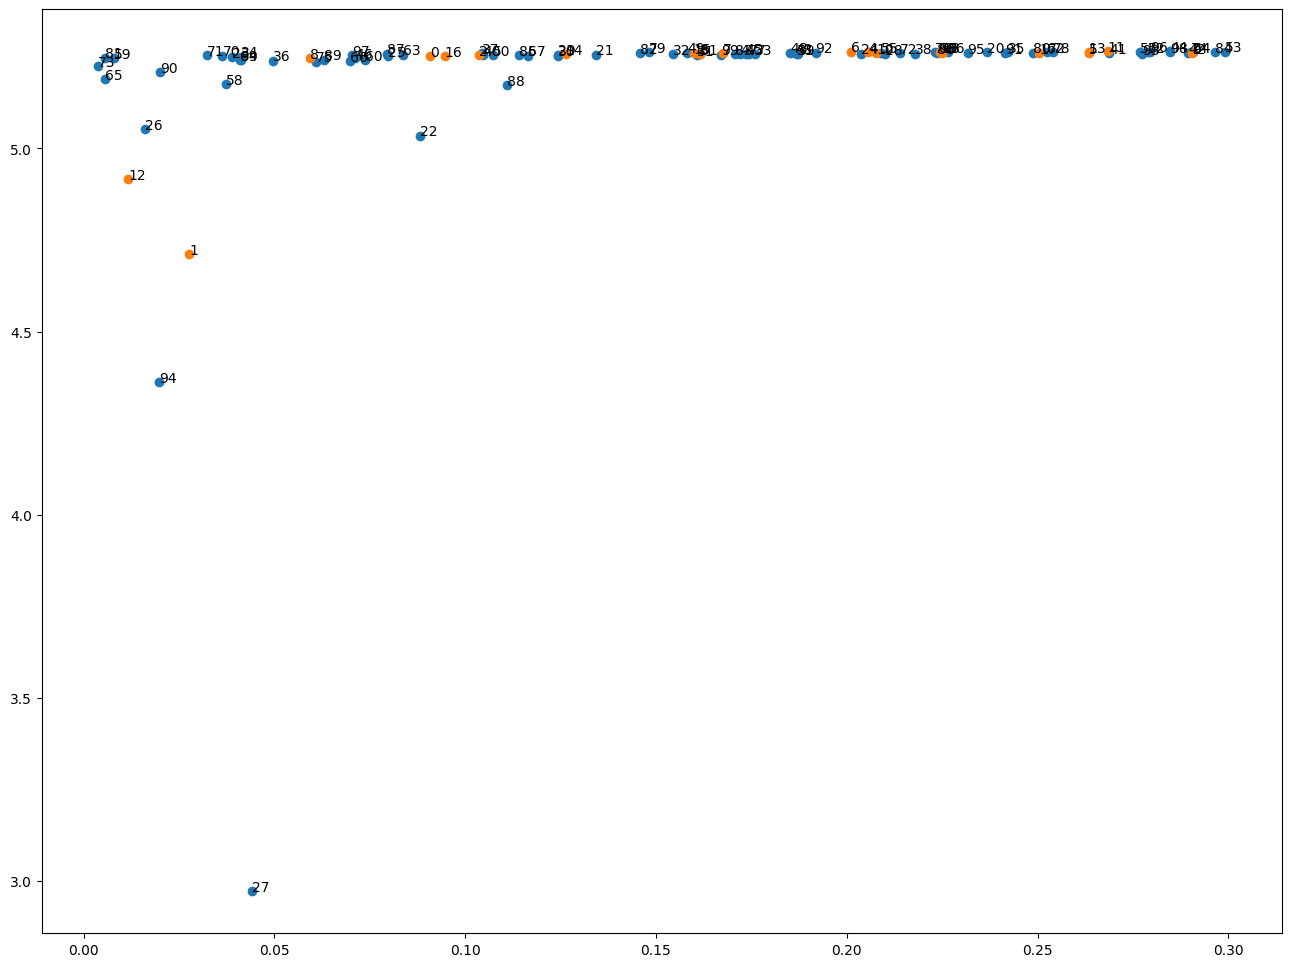

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


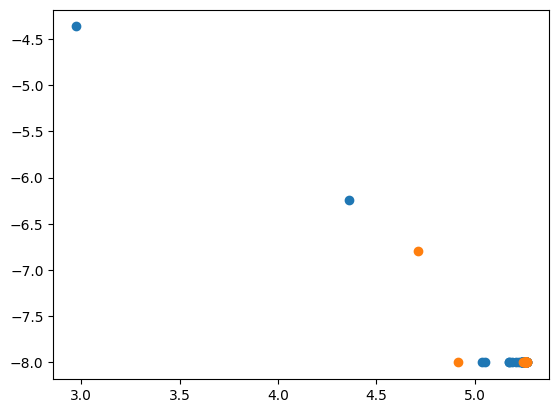

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 13.84113  validloss 14.51998±0.00000  bestvalidloss 14.51998  last_update 0
train: iter 1  trainloss 12.56526  validloss 13.14929±0.00000  bestvalidloss 13.14929  last_update 0
train: iter 2  trainloss 11.48915  validloss 11.97213±0.00000  bestvalidloss 11.97213  last_update 0
train: iter 3  trainloss 10.54570  validloss 10.97037±0.00000  bestvalidloss 10.97037  last_update 0
train: iter 4  trainloss 9.73814  validloss 10.13227±0.00000  bestvalidloss 10.13227  last_update 0
train: iter 5  trainloss 9.03212  validloss 9.35770±0.00000  bestvalidloss 9.35770  last_update 0
train: iter 6  trainloss 8.40581  validloss 8.72774±0.00000  bestvalidloss 8.72774  last_update 0
train: iter 7  trainloss 7.86331  validloss 8.08978±0.00000  bestvalidloss 8.08978  last_update 0
train: iter 8  trainloss 7.37258  validloss 7.59952±0.00000  bestvalidloss 7.59952  last_update 0
train: iter 9  trainloss 6.94067  validloss 7.14379±0.00000  bestvalidloss 7.14379  last_update 0
train:

train: iter 84  trainloss 1.68380  validloss 1.69440±0.00000  bestvalidloss 1.69440  last_update 0
train: iter 85  trainloss 1.64247  validloss 1.65814±0.00000  bestvalidloss 1.65814  last_update 0
train: iter 86  trainloss 1.60408  validloss 1.61807±0.00000  bestvalidloss 1.61807  last_update 0
train: iter 87  trainloss 1.56231  validloss 1.57215±0.00000  bestvalidloss 1.57215  last_update 0
train: iter 88  trainloss 1.52029  validloss 1.52867±0.00000  bestvalidloss 1.52867  last_update 0
train: iter 89  trainloss 1.47159  validloss 1.48681±0.00000  bestvalidloss 1.48681  last_update 0
train: iter 90  trainloss 1.42795  validloss 1.43956±0.00000  bestvalidloss 1.43956  last_update 0
train: iter 91  trainloss 1.38134  validloss 1.39233±0.00000  bestvalidloss 1.39233  last_update 0
train: iter 92  trainloss 1.33368  validloss 1.34458±0.00000  bestvalidloss 1.34458  last_update 0
train: iter 93  trainloss 1.28423  validloss 1.29572±0.00000  bestvalidloss 1.29572  last_update 0
train: ite

train: iter 172  trainloss 0.12778  validloss -0.06705±0.00000  bestvalidloss -0.06705  last_update 0
train: iter 173  trainloss 0.18363  validloss -0.04829±0.00000  bestvalidloss -0.06705  last_update 1
train: iter 174  trainloss 0.16839  validloss -0.06517±0.00000  bestvalidloss -0.06705  last_update 2
train: iter 175  trainloss 0.17812  validloss -0.07098±0.00000  bestvalidloss -0.07098  last_update 0
train: iter 176  trainloss 0.13450  validloss -0.05411±0.00000  bestvalidloss -0.07098  last_update 1
train: iter 177  trainloss 0.19342  validloss -0.08349±0.00000  bestvalidloss -0.08349  last_update 0
train: iter 178  trainloss 0.17934  validloss -0.08045±0.00000  bestvalidloss -0.08349  last_update 1
train: iter 179  trainloss 0.12831  validloss -0.08031±0.00000  bestvalidloss -0.08349  last_update 2
train: iter 180  trainloss 0.15401  validloss -0.08330±0.00000  bestvalidloss -0.08349  last_update 3
train: iter 181  trainloss 0.13466  validloss -0.07899±0.00000  bestvalidloss -0.0

train: iter 262  trainloss 0.11650  validloss -0.18623±0.00000  bestvalidloss -0.21076  last_update 13
train: iter 263  trainloss 0.15089  validloss -0.19990±0.00000  bestvalidloss -0.21076  last_update 14
train: iter 264  trainloss 0.14232  validloss -0.18593±0.00000  bestvalidloss -0.21076  last_update 15
train: iter 265  trainloss 0.13209  validloss -0.19758±0.00000  bestvalidloss -0.21076  last_update 16
train: iter 266  trainloss 0.12599  validloss -0.18159±0.00000  bestvalidloss -0.21076  last_update 17
train: iter 267  trainloss 0.14180  validloss -0.20568±0.00000  bestvalidloss -0.21076  last_update 18
train: iter 268  trainloss 0.14204  validloss -0.19288±0.00000  bestvalidloss -0.21076  last_update 19
train: iter 269  trainloss 0.13549  validloss -0.20158±0.00000  bestvalidloss -0.21076  last_update 20
train: iter 270  trainloss 0.12404  validloss -0.19332±0.00000  bestvalidloss -0.21076  last_update 21
train: iter 271  trainloss 0.11344  validloss -0.18696±0.00000  bestvalid

train: iter 352  trainloss 0.13442  validloss -0.23268±0.00000  bestvalidloss -0.25128  last_update 4
train: iter 353  trainloss 0.07758  validloss -0.24295±0.00000  bestvalidloss -0.25128  last_update 5
train: iter 354  trainloss 0.08723  validloss -0.23759±0.00000  bestvalidloss -0.25128  last_update 6
train: iter 355  trainloss 0.16119  validloss -0.22408±0.00000  bestvalidloss -0.25128  last_update 7
train: iter 356  trainloss 0.07776  validloss -0.23383±0.00000  bestvalidloss -0.25128  last_update 8
train: iter 357  trainloss 0.12585  validloss -0.22201±0.00000  bestvalidloss -0.25128  last_update 9
train: iter 358  trainloss 0.07636  validloss -0.21606±0.00000  bestvalidloss -0.25128  last_update 10
train: iter 359  trainloss 0.14117  validloss -0.22527±0.00000  bestvalidloss -0.25128  last_update 11
train: iter 360  trainloss 0.12337  validloss -0.22848±0.00000  bestvalidloss -0.25128  last_update 12
train: iter 361  trainloss 0.10995  validloss -0.23860±0.00000  bestvalidloss -

train: iter 442  trainloss 0.10573  validloss -0.24915±0.00000  bestvalidloss -0.27074  last_update 51
train: iter 443  trainloss 0.16383  validloss -0.24881±0.00000  bestvalidloss -0.27074  last_update 52
train: iter 444  trainloss 0.08511  validloss -0.24388±0.00000  bestvalidloss -0.27074  last_update 53
train: iter 445  trainloss 0.19055  validloss -0.22892±0.00000  bestvalidloss -0.27074  last_update 54
train: iter 446  trainloss 0.16052  validloss -0.25233±0.00000  bestvalidloss -0.27074  last_update 55
train: iter 447  trainloss 0.12139  validloss -0.24581±0.00000  bestvalidloss -0.27074  last_update 56
train: iter 448  trainloss 0.12261  validloss -0.23367±0.00000  bestvalidloss -0.27074  last_update 57
train: iter 449  trainloss 0.13996  validloss -0.24489±0.00000  bestvalidloss -0.27074  last_update 58
train: iter 450  trainloss 0.12632  validloss -0.25607±0.00000  bestvalidloss -0.27074  last_update 59
train: iter 451  trainloss 0.16945  validloss -0.25189±0.00000  bestvalid

train: iter 531  trainloss 0.13495  validloss -0.22588±0.00000  bestvalidloss -0.27989  last_update 9
train: iter 532  trainloss 0.10190  validloss -0.25639±0.00000  bestvalidloss -0.27989  last_update 10
train: iter 533  trainloss 0.09715  validloss -0.25893±0.00000  bestvalidloss -0.27989  last_update 11
train: iter 534  trainloss 0.19365  validloss -0.27356±0.00000  bestvalidloss -0.27989  last_update 12
train: iter 535  trainloss 0.13493  validloss -0.25925±0.00000  bestvalidloss -0.27989  last_update 13
train: iter 536  trainloss 0.15635  validloss -0.24310±0.00000  bestvalidloss -0.27989  last_update 14
train: iter 537  trainloss 0.13662  validloss -0.24611±0.00000  bestvalidloss -0.27989  last_update 15
train: iter 538  trainloss 0.12399  validloss -0.24184±0.00000  bestvalidloss -0.27989  last_update 16
train: iter 539  trainloss 0.22604  validloss -0.24281±0.00000  bestvalidloss -0.27989  last_update 17
train: iter 540  trainloss 0.05787  validloss -0.25328±0.00000  bestvalidl

train: iter 611  trainloss 0.12070  validloss -0.23918±0.00000  bestvalidloss -0.27989  last_update 89
train: iter 612  trainloss 0.10418  validloss -0.22574±0.00000  bestvalidloss -0.27989  last_update 90
train: iter 613  trainloss 0.10852  validloss -0.25155±0.00000  bestvalidloss -0.27989  last_update 91
train: iter 614  trainloss 0.11380  validloss -0.24968±0.00000  bestvalidloss -0.27989  last_update 92
train: iter 615  trainloss 0.15355  validloss -0.24464±0.00000  bestvalidloss -0.27989  last_update 93
train: iter 616  trainloss 0.09149  validloss -0.24018±0.00000  bestvalidloss -0.27989  last_update 94
train: iter 617  trainloss 0.13078  validloss -0.26133±0.00000  bestvalidloss -0.27989  last_update 95
train: iter 618  trainloss 0.18438  validloss -0.25667±0.00000  bestvalidloss -0.27989  last_update 96
train: iter 619  trainloss 0.14627  validloss -0.25392±0.00000  bestvalidloss -0.27989  last_update 97
train: iter 620  trainloss 0.10904  validloss -0.24526±0.00000  bestvalid

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 5.2071, -2.5876], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 13.11378  validloss 18.31129±0.00000  bestvalidloss 18.31129  last_update 0
train: iter 1  trainloss 6.41960  validloss 9.40107±0.00000  bestvalidloss 9.40107  last_update 0
train: iter 2  trainloss 3.97668  validloss 4.69720±0.00000  bestvalidloss 4.69720  last_update 0
train: iter 3  trainloss 3.33964  validloss 3.18625±0.00000  bestvalidloss 3.18625  last_update 0
train: iter 4  trainloss 3.04847  validloss 2.63925±0.00000  bestvalidloss 2.63925  last_update 0
train: iter 5  trainloss 2.92693  validloss 2.36491±0.00000  bestvalidloss 2.36491  last_update 0
train: iter 6  trainloss 2.89819  validloss 2.20453±0.00000  bestvalidloss 2.20453  last_update 0
train: iter 7  trainloss 2.84292  validloss 2.13431±0.00000  bestvalidloss 2.13431  last_update 0
train: iter 8  trainloss 2.76670  validloss 2.03173±0.00000  bestvalidloss 2.03173  last_update 0
train: iter 9  trainloss 2.77504  validloss 1.99268±0.00000  bestvalidloss 1.99268  last_update 0
train: iter 10  t

train: iter 85  trainloss 2.22249  validloss 1.46375±0.00000  bestvalidloss 1.39833  last_update 4
train: iter 86  trainloss 2.19835  validloss 1.44658±0.00000  bestvalidloss 1.39833  last_update 5
train: iter 87  trainloss 2.19654  validloss 1.50526±0.00000  bestvalidloss 1.39833  last_update 6
train: iter 88  trainloss 2.21420  validloss 1.42569±0.00000  bestvalidloss 1.39833  last_update 7
train: iter 89  trainloss 2.20083  validloss 1.44153±0.00000  bestvalidloss 1.39833  last_update 8
train: iter 90  trainloss 2.18584  validloss 1.44209±0.00000  bestvalidloss 1.39833  last_update 9
train: iter 91  trainloss 2.22113  validloss 1.62419±0.00000  bestvalidloss 1.39833  last_update 10
train: iter 92  trainloss 2.17007  validloss 1.44456±0.00000  bestvalidloss 1.39833  last_update 11
train: iter 93  trainloss 2.16338  validloss 1.44970±0.00000  bestvalidloss 1.39833  last_update 12
train: iter 94  trainloss 2.21627  validloss 1.42541±0.00000  bestvalidloss 1.39833  last_update 13
train:

train: iter 167  trainloss 2.17364  validloss 1.42079±0.00000  bestvalidloss 1.39124  last_update 40
train: iter 168  trainloss 2.16392  validloss 1.43848±0.00000  bestvalidloss 1.39124  last_update 41
train: iter 169  trainloss 2.13295  validloss 1.44592±0.00000  bestvalidloss 1.39124  last_update 42
train: iter 170  trainloss 2.13356  validloss 1.41907±0.00000  bestvalidloss 1.39124  last_update 43
train: iter 171  trainloss 2.18019  validloss 1.41212±0.00000  bestvalidloss 1.39124  last_update 44
train: iter 172  trainloss 2.11874  validloss 1.45561±0.00000  bestvalidloss 1.39124  last_update 45
train: iter 173  trainloss 2.14539  validloss 1.49234±0.00000  bestvalidloss 1.39124  last_update 46
train: iter 174  trainloss 2.18940  validloss 1.42548±0.00000  bestvalidloss 1.39124  last_update 47
train: iter 175  trainloss 2.12245  validloss 1.44474±0.00000  bestvalidloss 1.39124  last_update 48
train: iter 176  trainloss 2.17418  validloss 1.42341±0.00000  bestvalidloss 1.39124  last_

train: iter 249  trainloss 2.18348  validloss 1.48598±0.00000  bestvalidloss 1.37100  last_update 49
train: iter 250  trainloss 2.13882  validloss 1.45360±0.00000  bestvalidloss 1.37100  last_update 50
train: iter 251  trainloss 2.17002  validloss 1.41587±0.00000  bestvalidloss 1.37100  last_update 51
train: iter 252  trainloss 2.13494  validloss 1.42327±0.00000  bestvalidloss 1.37100  last_update 52
train: iter 253  trainloss 2.14847  validloss 1.40873±0.00000  bestvalidloss 1.37100  last_update 53
train: iter 254  trainloss 2.20114  validloss 1.43385±0.00000  bestvalidloss 1.37100  last_update 54
train: iter 255  trainloss 2.13543  validloss 1.43183±0.00000  bestvalidloss 1.37100  last_update 55
train: iter 256  trainloss 2.20973  validloss 1.51120±0.00000  bestvalidloss 1.37100  last_update 56
train: iter 257  trainloss 2.14915  validloss 1.55659±0.00000  bestvalidloss 1.37100  last_update 57
train: iter 258  trainloss 2.19564  validloss 1.46899±0.00000  bestvalidloss 1.37100  last_

train: iter 333  trainloss 2.17906  validloss 1.41212±0.00000  bestvalidloss 1.36216  last_update 40
train: iter 334  trainloss 2.17396  validloss 1.40071±0.00000  bestvalidloss 1.36216  last_update 41
train: iter 335  trainloss 2.18244  validloss 1.42258±0.00000  bestvalidloss 1.36216  last_update 42
train: iter 336  trainloss 2.15242  validloss 1.43746±0.00000  bestvalidloss 1.36216  last_update 43
train: iter 337  trainloss 2.11778  validloss 1.47635±0.00000  bestvalidloss 1.36216  last_update 44
train: iter 338  trainloss 2.16084  validloss 1.37287±0.00000  bestvalidloss 1.36216  last_update 45
train: iter 339  trainloss 2.13644  validloss 1.36422±0.00000  bestvalidloss 1.36216  last_update 46
train: iter 340  trainloss 2.17151  validloss 1.49427±0.00000  bestvalidloss 1.36216  last_update 47
train: iter 341  trainloss 2.13960  validloss 1.41299±0.00000  bestvalidloss 1.36216  last_update 48
train: iter 342  trainloss 2.10985  validloss 1.41921±0.00000  bestvalidloss 1.36216  last_

train: iter 415  trainloss 2.12554  validloss 1.49848±0.00000  bestvalidloss 1.35338  last_update 36
train: iter 416  trainloss 2.13930  validloss 1.39213±0.00000  bestvalidloss 1.35338  last_update 37
train: iter 417  trainloss 2.12093  validloss 1.47817±0.00000  bestvalidloss 1.35338  last_update 38
train: iter 418  trainloss 2.12974  validloss 1.47573±0.00000  bestvalidloss 1.35338  last_update 39
train: iter 419  trainloss 2.10271  validloss 1.40335±0.00000  bestvalidloss 1.35338  last_update 40
train: iter 420  trainloss 2.12033  validloss 1.43001±0.00000  bestvalidloss 1.35338  last_update 41
train: iter 421  trainloss 2.14028  validloss 1.46827±0.00000  bestvalidloss 1.35338  last_update 42
train: iter 422  trainloss 2.15291  validloss 1.43688±0.00000  bestvalidloss 1.35338  last_update 43
train: iter 423  trainloss 2.10895  validloss 1.47896±0.00000  bestvalidloss 1.35338  last_update 44
train: iter 424  trainloss 2.13941  validloss 1.57083±0.00000  bestvalidloss 1.35338  last_

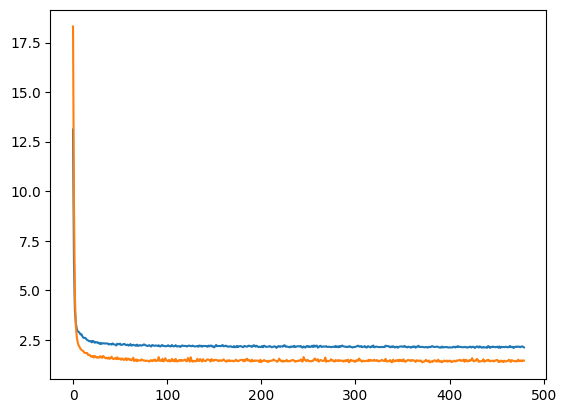

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(2.6196)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-0.8466)


In [21]:
print(vi.h_min_tilde)

-5.682982


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.6830738991579016
tensor([-0.5049])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

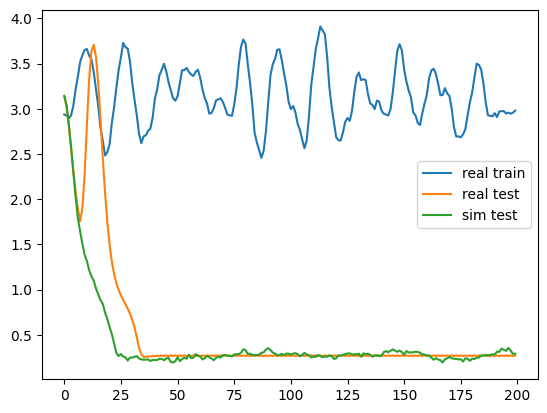

encoder [ 5.262645 -8.      ]
initial_belief tensor([ 5.2071, -2.5876])
real train tensor([ 5.2712, -8.0052])
real test tensor([ 4.8981, -8.0083])
sim tensor([ 5.2662, -7.9980])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


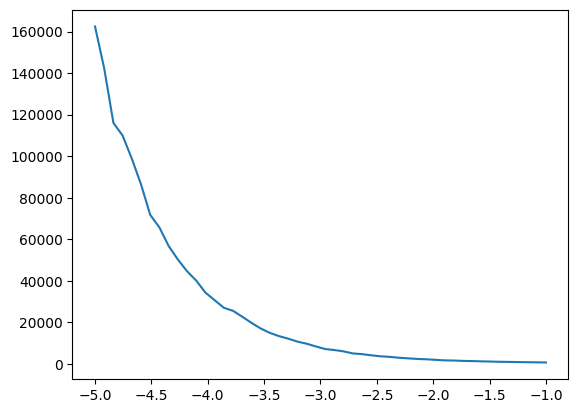

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.4184477607115762
tensor([1.8478])
